In [30]:
import numpy as np
x1=np.array([0,1,2,3,4,5,6,7,8,9])
x0= np.ones(x1.shape[0])
x=np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta=np.random.randn(x.shape[1])


In [31]:
x.shape

(10, 2)

In [32]:
theta

array([ 0.84012284, -0.47303848])

In [33]:
np.dot(x,theta)

array([ 0.84012284,  0.36708436, -0.10595412, -0.5789926 , -1.05203108,
       -1.52506956, -1.99810805, -2.47114653, -2.94418501, -3.41722349])

In [34]:
x1=np.array([0,1,2,3,4,5,6,7,8])
y=np.array([2,4,2,1,6,7,8,5,2])
x0= np.ones(x1.shape[0])
x=np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta=np.random.randn(2)
y1=np.dot(x,theta)
alpha=0.01
error=(y1-y)
theta[0]=theta[0]-alpha*np.mean(error)
theta[1]=theta[1]-alpha*np.mean(error*x1)

In [35]:
np.mean(error)

-2.247666592607028

In [36]:
np.mean(error*x1)

-9.106147027302667

In [37]:
np.dot(error,x)

array([-20.22899933, -81.95532325])

In [38]:
x1=np.array([0,1,2,3,4,5,6,7,8])
y=np.array([2,4,2,1,6,7,8,5,2])
x0= np.ones(x1.shape[0])
x=np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta=np.random.randn(2)
y1=np.dot(x,theta)
alpha=0.01
error=(y1-y)
theta=theta-alpha*np.dot(error,x)/len(x)
print (theta)

[0.4246486  1.12182481]


In [39]:
x.shape

(9, 2)

In [40]:
y1.shape

(9,)

In [41]:
y1.reshape(-1,1)

array([[ 0.43712592],
       [ 1.66755532],
       [ 2.89798472],
       [ 4.12841412],
       [ 5.35884353],
       [ 6.58927293],
       [ 7.81970233],
       [ 9.05013173],
       [10.28056113]])

In [42]:
theta

array([0.4246486 , 1.12182481])

In [43]:

x=np.random.randn(30,1)
y=np.random.randn(30,)
x_test=np.random.randn(5,1)

In [44]:
x.max()

2.444350059377621

In [45]:
print('x.shape',x.shape)
print('y.shape',y.shape)

x.shape (30, 1)
y.shape (30,)


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [47]:
class ScratchLinearRegression():
   
    
    def __init__(self, num_iter=10000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
       
        
    
        
        if self.verbose:
            print()
   
        
   
    def _linear_hypothesis(self, x):
        x1=x
        if self.no_bias==True:
            x0=np.zeros(x1.shape[0])
        else:
            x0=np.ones(x1.shape[0]) 
        return np.concatenate([x0.reshape(-1,1),x1],axis=1) 
    def _gradient_descent(self, x, error):
        self.theta=self.theta-self.lr*np.dot(error,x)/len(x)

    def fit(self, x, y, x_val=False, y_val=False):
        x1=self._linear_hypothesis(x)
        self.theta=np.random.random(x1.shape[1])
        for i in range(self.iter):
            y1=np.dot(x1,self .theta)
            error=y1-y
            self.loss[i]+=np.mean(error**2)/2
            if (type(x_val)!=bool):
                x2=self._linear_hypothesis(x_val)
                y2=np.dot(x2,self.theta)
                error_val=y2-y_val
                self.loss[i]+=np.mean(error_val**2)/2
            self._gradient_descent(x1,error)
            if self.verbose:
               print ('n_iter:',i,'loss:',self.loss[i],'theta:',self.theta) 
    def predict(self, x):
        return np.dot(self._linear_hypothesis(x),self.theta)

x.shape (30, 1)
y.shape (30,)


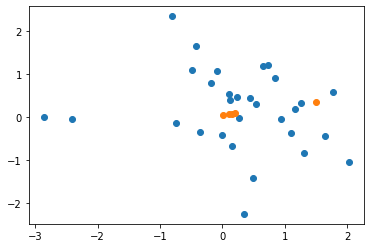

In [48]:

reg = ScratchLinearRegression(num_iter=10000,lr=0.0001,verbose=False)
reg.fit(x,y)
y_pred=reg.predict(x_test)


x=np.random.randn(30,1)
y=np.random.randn(30,)
x_test=np.random.randn(5,1)
x.max()
print('x.shape',x.shape)
print('y.shape',y.shape)
reg=ScratchLinearRegression(num_iter=10000,lr=0.0001,verbose=False)
reg.fit(x,y)
y_pred=reg.predict(x_test)
plt.scatter(x,y)
plt.scatter(x_test,y_pred)
plt.plot();


In [49]:
def MSE(y_pred, y):
    mse=np.mean((y_pred-y)**2)
    pass
    return mse

In [50]:
y_test=np.array([2,4,2,1,6])
y_pred=np.array([1,4,3,5,2])
mse=MSE(y_pred,y_test)
mse

6.8

In [51]:
from sklearn.metrics import  mean_squared_error
y_test=np.array([2,4,2,1,6])
y_pred=np.array([1,4,3,5,2])
mean_squared_error(y_pred,y_test)

6.8

In [52]:
print (reg.loss.shape)
reg.loss.reshape(-1,1)

(10000,)


array([[1.10043886],
       [1.1002825 ],
       [1.10012618],
       ...,
       [0.49010334],
       [0.49008669],
       [0.49007005]])

In [53]:
print(reg.val_loss.shape)
reg.val_loss.reshape(-1,1)

(10000,)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [54]:
train=pd.read_csv('train.csv'
)
print('shape:',train.shape)
train.head()

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
x=train[['YearBuilt']].values
y=train[['SalePrice']].values
y=y.reshape(-1)
print('x.shape',x.shape)
print('y.shape',y.shape)

x.shape (1460, 1)
y.shape (1460,)


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=\
train_test_split(x,y,train_size=0.8,random_state=0)
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_valid.shape:',x_valid.shape)
print('y_valid.shape:',y_valid.shape)

x_train.shape: (1168, 1)
y_train.shape: (1168,)
x_valid.shape: (292, 1)
y_valid.shape: (292,)


In [57]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_valid_std=scaler.transform(x_valid)

In [58]:
reg1=ScratchLinearRegression(num_iter=10000,lr=0.01)
reg1.fit(x_train_std,y_train,x_valid_std,y_valid)
y_pred1=reg1.predict(x_valid_std)


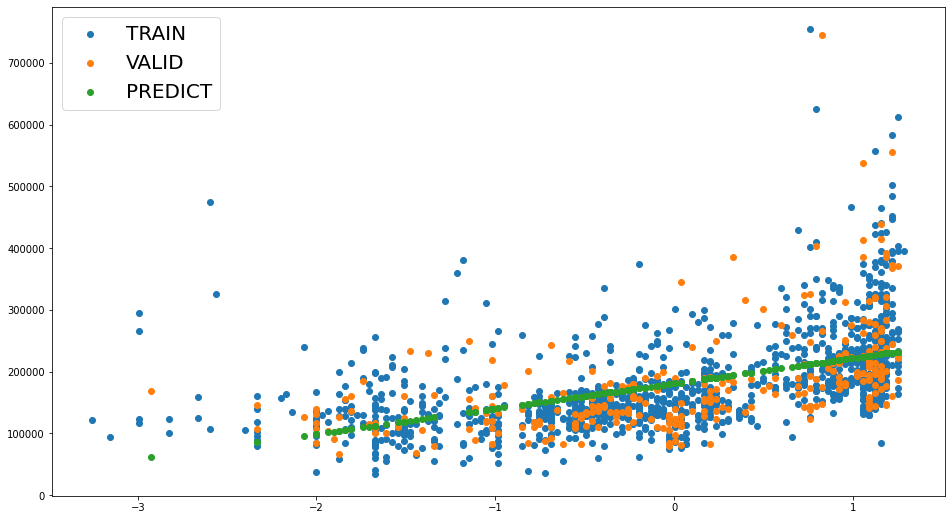

In [59]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std,y_train,label="TRAIN")
plt.scatter(x_valid_std, y_valid,label="VALID")
plt.scatter(x_valid_std,y_pred1,label="PREDICT")
plt.legend()
plt.show();

In [60]:
mse=MSE(y_pred1,y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1F}'.format(np.sqrt(mse)))


MSE4980069536.6
RMSE70569.6


In [61]:
from sklearn.linear_model import LinearRegression
reg2=LinearRegression()
reg2.fit(x_train_std,y_train)
y_pred_sklearn=reg2.predict(x_valid_std)


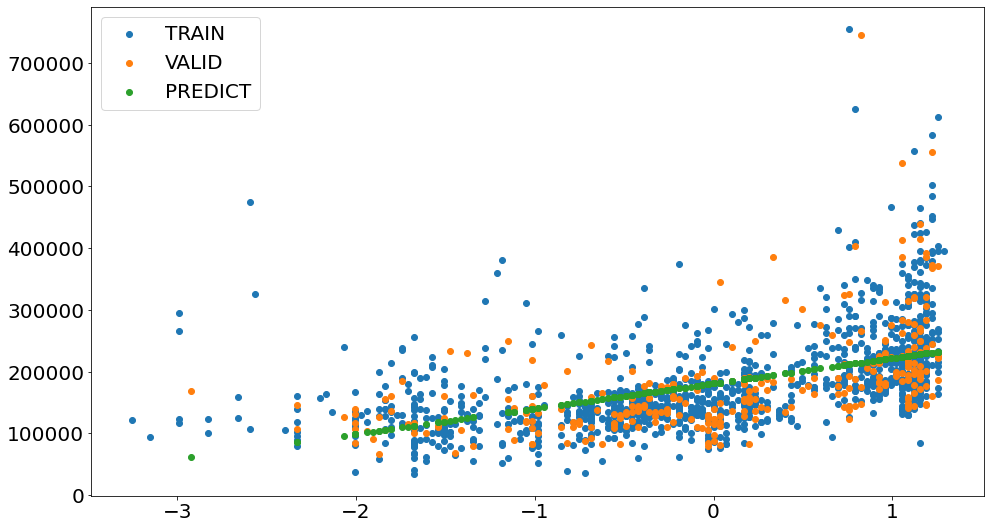

In [62]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std,y_train,label="TRAIN")
plt.scatter(x_valid_std, y_valid,label="VALID")
plt.scatter(x_valid_std,y_pred_sklearn,label="PREDICT")
plt.legend()
plt.show();

In [63]:
mse=MSE(y_pred_sklearn,y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1F}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


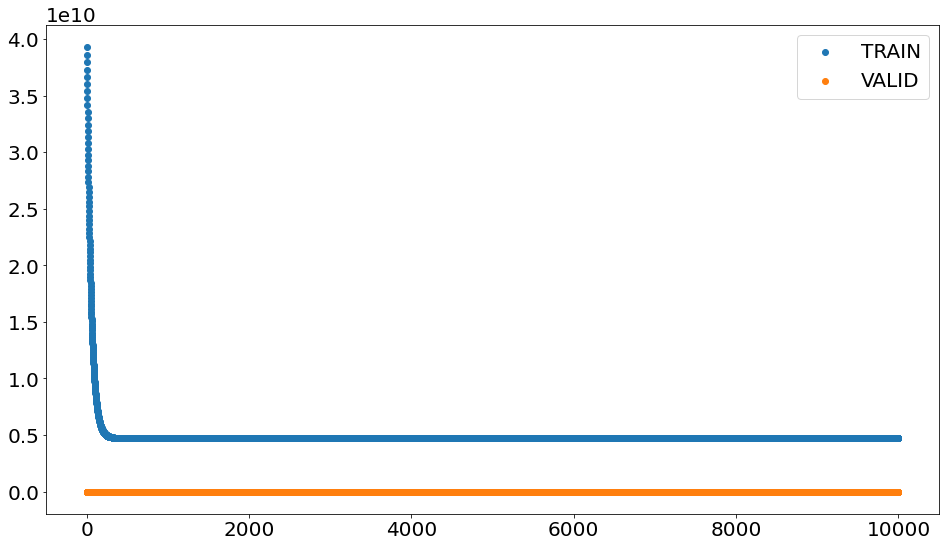

In [64]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(range(len(reg1.loss)),reg1.loss,label='TRAIN')
plt.scatter(range(len(reg1.val_loss)),reg1.val_loss,label='VALID')
plt.legend()
plt.show();

In [65]:
reg3=ScratchLinearRegression(num_iter=5000,lr=0.01)
reg3.fit(x_train_std,y_train,x_valid_std,y_valid)
y_pred3=reg3.predict(x_valid_std)

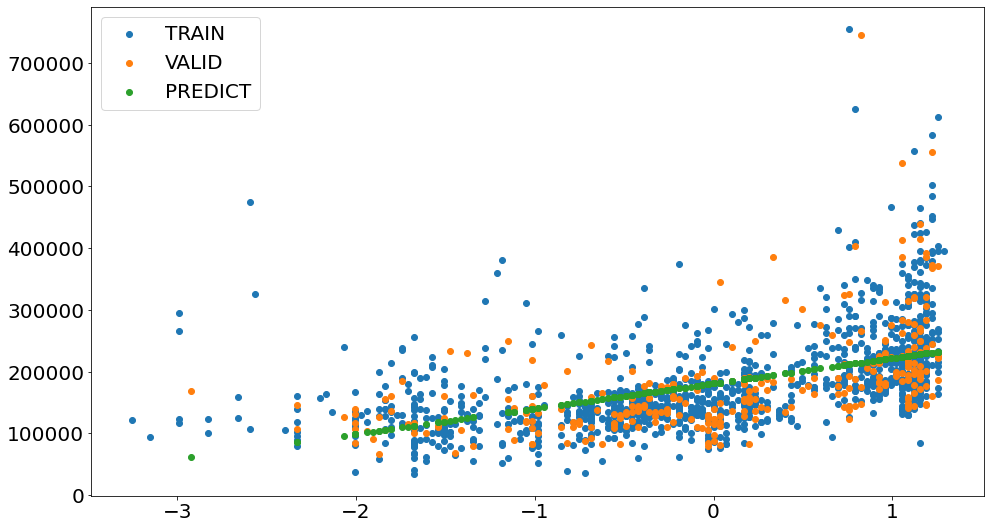

In [66]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std,y_train,label="TRAIN")
plt.scatter(x_valid_std, y_valid,label="VALID")
plt.scatter(x_valid_std,y_pred3,label="PREDICT")
plt.legend()
plt.show();

In [67]:
mse=MSE(y_pred3,y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1F}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


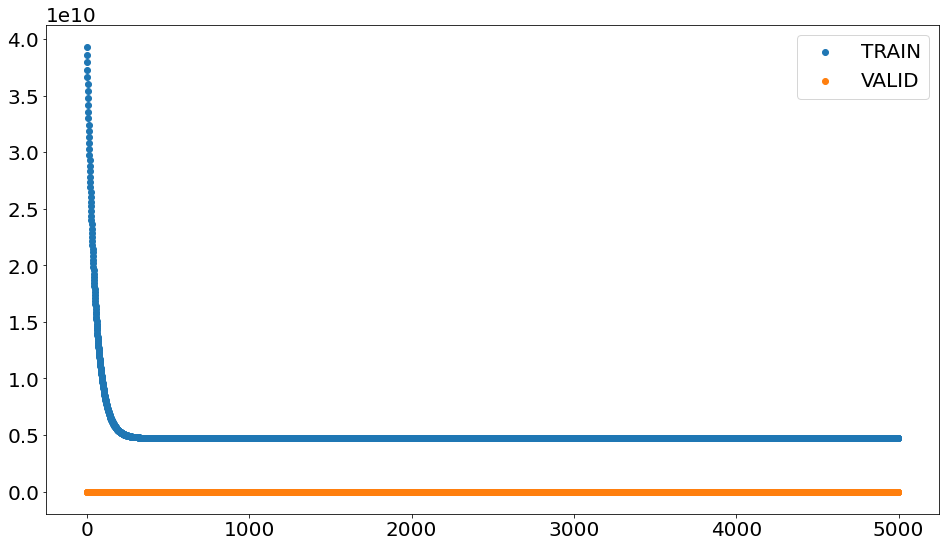

In [68]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(range(len(reg3.loss)),reg3.loss,label='TRAIN')
plt.scatter(range(len(reg3.val_loss)),reg3.val_loss,label='VALID')
plt.legend()
plt.show();

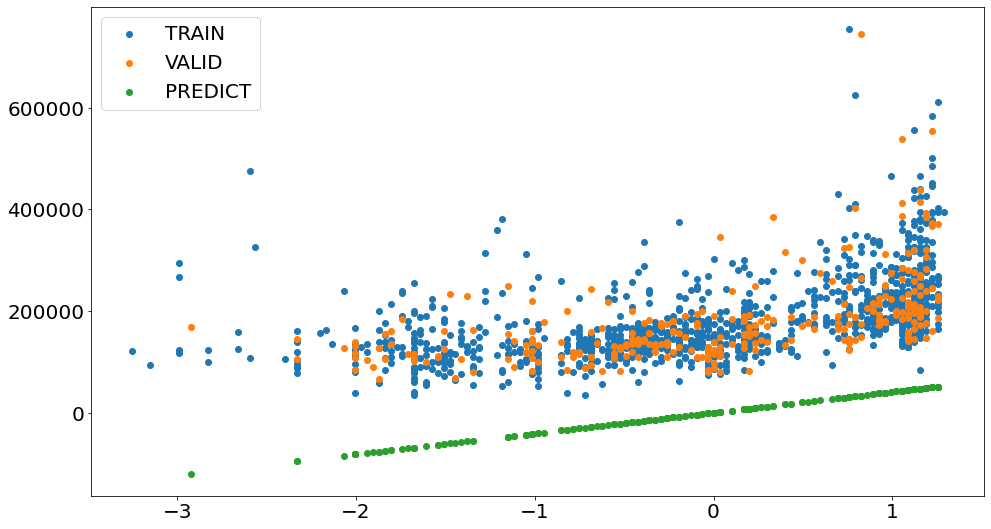

In [69]:
reg4=ScratchLinearRegression(num_iter=5000,lr=0.01,no_bias=True)
reg4.fit(x_train_std,y_train,x_valid_std,y_valid)
y_pred4=reg4.predict(x_valid_std)

fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std,y_train,label="TRAIN")
plt.scatter(x_valid_std, y_valid,label="VALID")
plt.scatter(x_valid_std,y_pred4,label="PREDICT")
plt.legend()
plt.show();

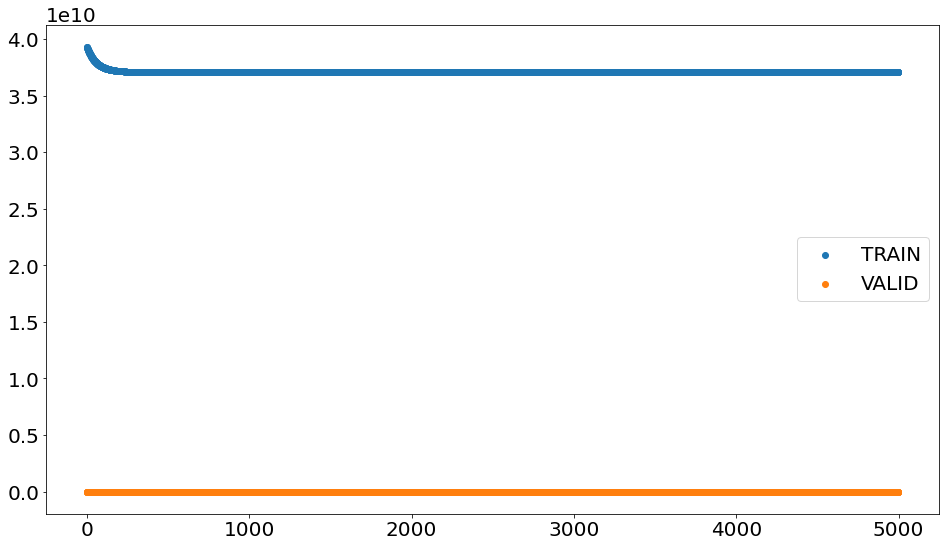

In [70]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(range(len(reg4.loss)),reg4.loss,label='TRAIN')
plt.scatter(range(len(reg4.val_loss)),reg4.val_loss,label='VALID')
plt.legend()
plt.show();

In [71]:
x=train[['YearBuilt','YearBuilt']].values
y=train[['SalePrice']].values
y=y.reshape(-1)
print('x.shape',x.shape)
print('y.shape',y.shape)

x.shape (1460, 2)
y.shape (1460,)


In [72]:
x[:,1]=x[:,1]**2
x

array([[   2003, 4012009],
       [   1976, 3904576],
       [   2001, 4004001],
       ...,
       [   1941, 3767481],
       [   1950, 3802500],
       [   1965, 3861225]])

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=\
train_test_split(x,y,train_size=0.8,random_state=0)
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_valid.shape:',x_valid.shape)
print('y_valid.shape:',y_valid.shape)

x_train.shape: (1168, 2)
y_train.shape: (1168,)
x_valid.shape: (292, 2)
y_valid.shape: (292,)


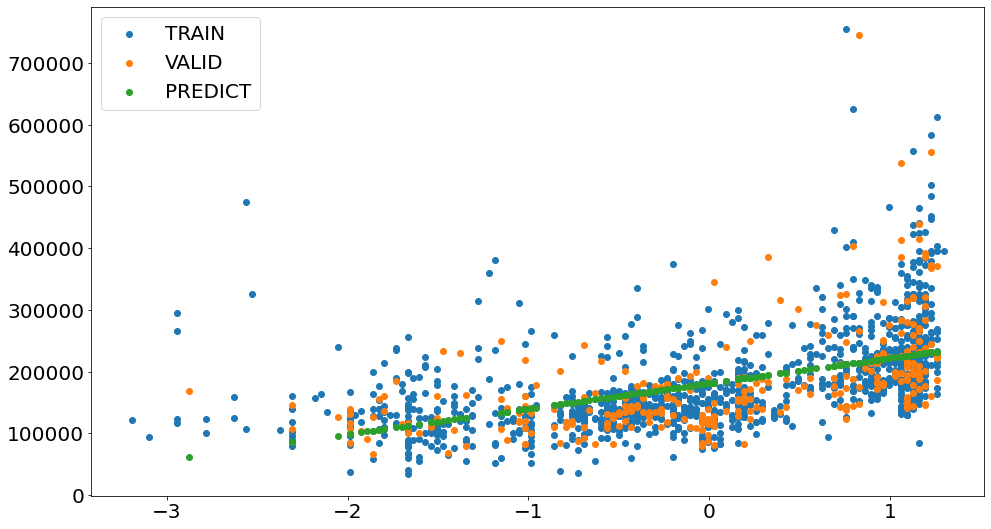

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_valid_std=scaler.transform(x_valid)

reg09=ScratchLinearRegression(num_iter=5000,lr=0.01)
reg09.fit(x_train_std,y_train,x_valid_std,y_valid)
y_pred09=reg09.predict(x_valid_std)

fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std[:,1],y_train,label="TRAIN")
plt.scatter(x_valid_std[:,1], y_valid,label="VALID")
plt.scatter(x_valid_std[:,1],y_pred09,label="PREDICT")
plt.legend()
plt.show();

In [75]:
mse=MSE(y_pred09,y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1F}'.format(np.sqrt(mse)))

MSE4971463609.0
RMSE70508.6


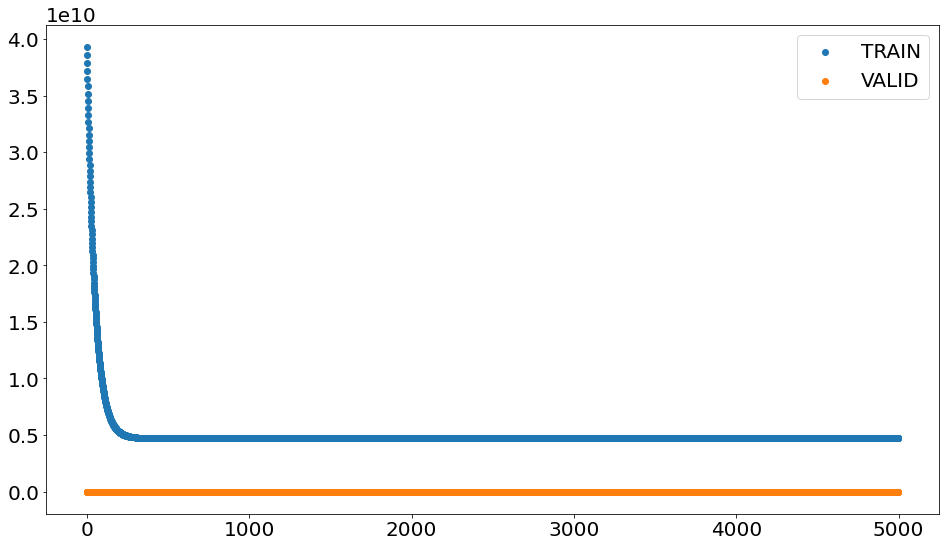

In [76]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(range(len(reg09.loss)),reg09.loss,label='TRAIN')
plt.scatter(range(len(reg09.val_loss)),reg09.val_loss,label='VALID')
plt.legend()
plt.show();

In [77]:
x=train[['YearBuilt','YearBuilt','YearBuilt']].values
y=train[['SalePrice']].values
y=y.reshape(-1)
print('x.shape',x.shape)
print('y.shape',y.shape)

x[:,1]=x[:,1]**2
x[:,2]=x[:,2]**3
x

x.shape (1460, 3)
y.shape (1460,)


array([[      2003,    4012009, 8036054027],
       [      1976,    3904576, 7715442176],
       [      2001,    4004001, 8012006001],
       ...,
       [      1941,    3767481, 7312680621],
       [      1950,    3802500, 7414875000],
       [      1965,    3861225, 7587307125]])

x_train.shape: (1168, 3)
y_train.shape: (1168,)
x_valid.shape: (292, 3)
y_valid.shape: (292,)


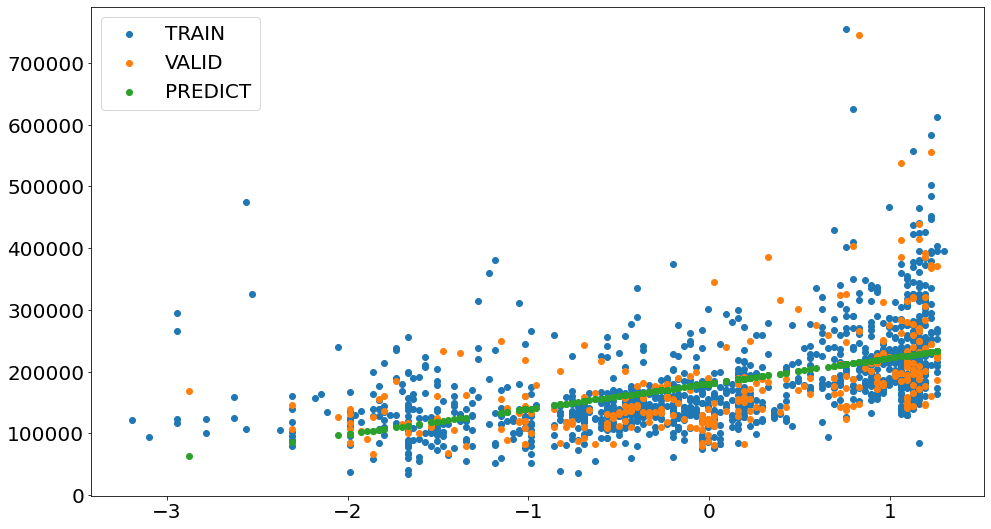

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=\
train_test_split(x,y,train_size=0.8,random_state=0)
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_valid.shape:',x_valid.shape)
print('y_valid.shape:',y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_valid_std=scaler.transform(x_valid)

reg10=ScratchLinearRegression(num_iter=5000,lr=0.01)
reg10.fit(x_train_std,y_train,x_valid_std,y_valid)
y_pred10=reg10.predict(x_valid_std)

fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std[:,1],y_train,label="TRAIN")
plt.scatter(x_valid_std[:,1], y_valid,label="VALID")
plt.scatter(x_valid_std[:,1],y_pred10,label="PREDICT")
plt.legend()
plt.show();

In [79]:
mse=MSE(y_pred10,y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1F}'.format(np.sqrt(mse)))

MSE4960227332.3
RMSE70428.9


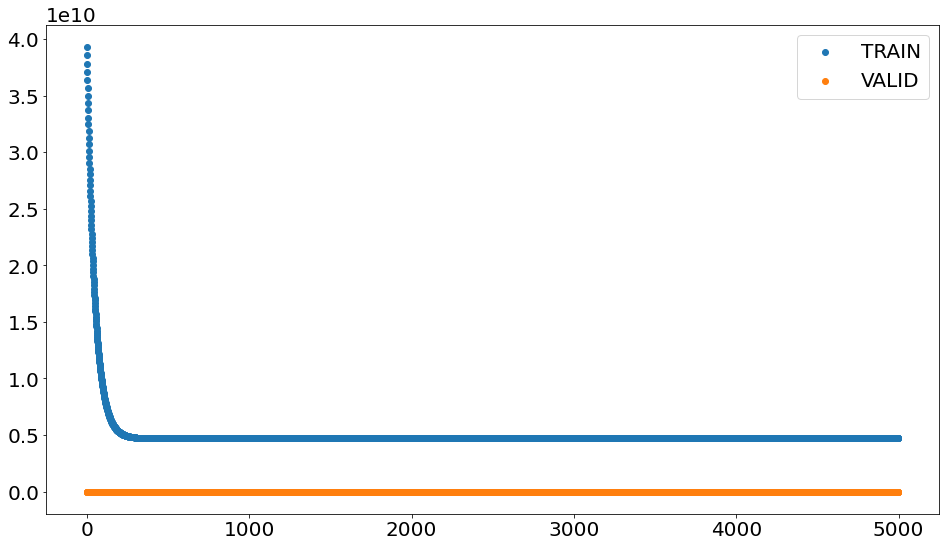

In [80]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(range(len(reg10.loss)),reg10.loss,label='TRAIN')
plt.scatter(range(len(reg10.val_loss)),reg10.val_loss,label='VALID')
plt.legend()
plt.show();

In [81]:
x=train[['GrLivArea','YearBuilt']].values
y=train[['SalePrice']].values
y=y.reshape(-1)
print('x.shape',x.shape)
print('y.shape',y.shape)

x.shape (1460, 2)
y.shape (1460,)


In [82]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=\
train_test_split(x,y,train_size=0.8,random_state=0)
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_valid.shape:',x_valid.shape)
print('y_valid.shape:',y_valid.shape)

x_train.shape: (1168, 2)
y_train.shape: (1168,)
x_valid.shape: (292, 2)
y_valid.shape: (292,)


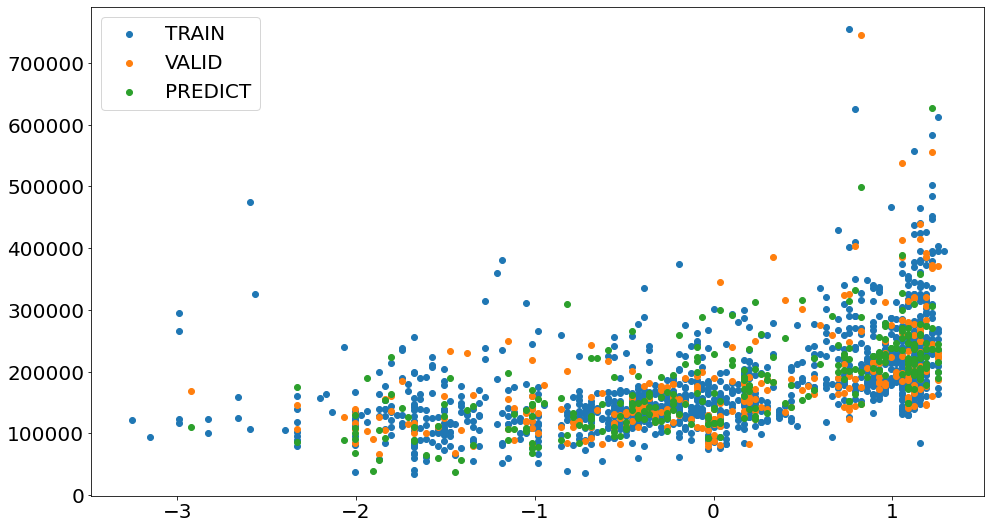

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_std=scaler.transform(x_train)
x_valid_std=scaler.transform(x_valid)

reg5=ScratchLinearRegression(num_iter=5000,lr=0.01)
reg5.fit(x_train_std,y_train,x_valid_std,y_valid)
y_pred5=reg5.predict(x_valid_std)

fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std[:,1],y_train,label="TRAIN")
plt.scatter(x_valid_std[:,1], y_valid,label="VALID")
plt.scatter(x_valid_std[:,1],y_pred5,label="PREDICT")
plt.legend()
plt.show();

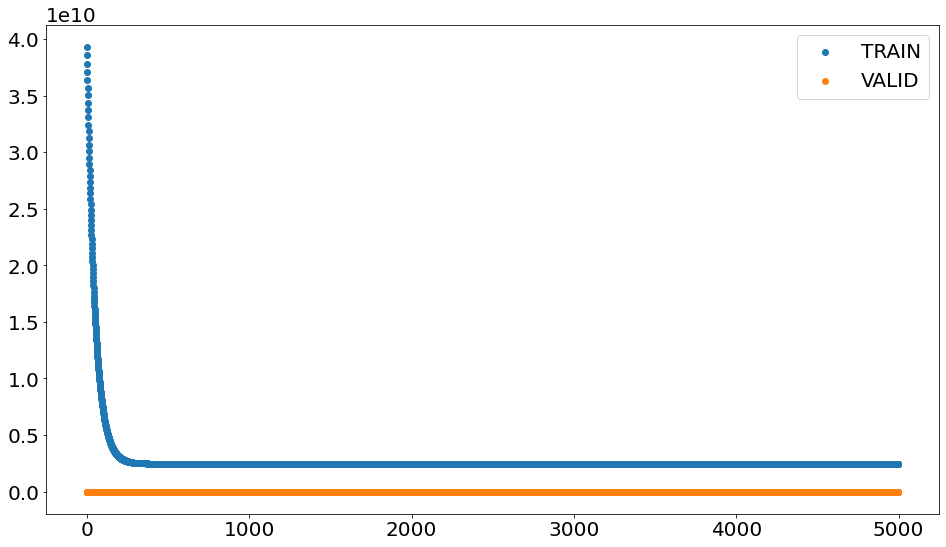

In [84]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(range(len(reg5.loss)),reg5.loss,label='TRAIN')
plt.scatter(range(len(reg5.val_loss)),reg5.val_loss,label='VALID')
plt.legend()
plt.show();

In [85]:
mse=MSE(y_pred5,y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1F}'.format(np.sqrt(mse)))

MSE2942066921.7
RMSE54240.8


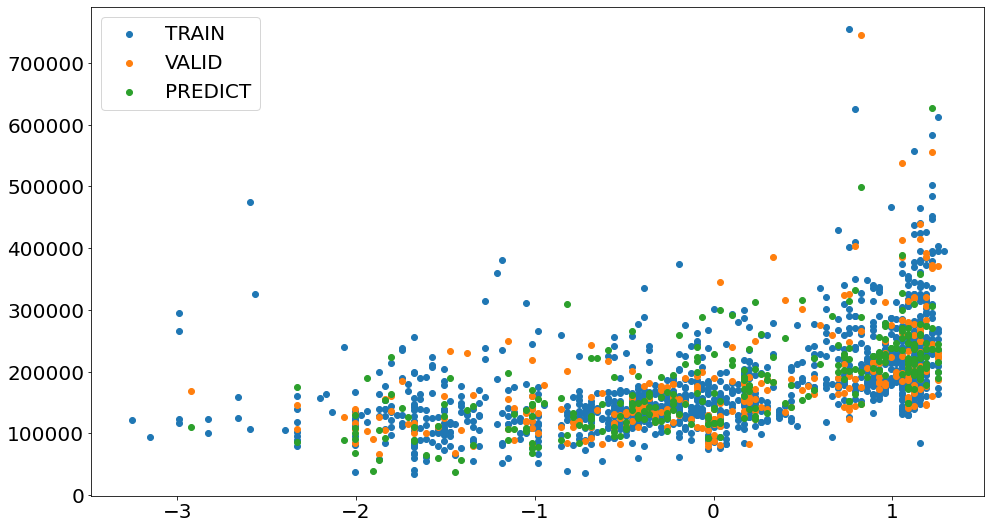

In [86]:
reg6=ScratchLinearRegression(num_iter=5000,lr=0.01)
reg6.fit(x_train_std,y_train,x_valid_std,y_valid)
y_pred6=reg6.predict(x_valid_std)

fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(x_train_std[:,1],y_train,label="TRAIN")
plt.scatter(x_valid_std[:,1], y_valid,label="VALID")
plt.scatter(x_valid_std[:,1],y_pred6,label="PREDICT")
plt.legend()
plt.show();

In [87]:
mse=MSE(y_pred6,y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1F}'.format(np.sqrt(mse)))

MSE2942066921.7
RMSE54240.8


In [88]:
reg6.theta

array([180808.8989726 ,  50765.58814766,  31427.62191205])

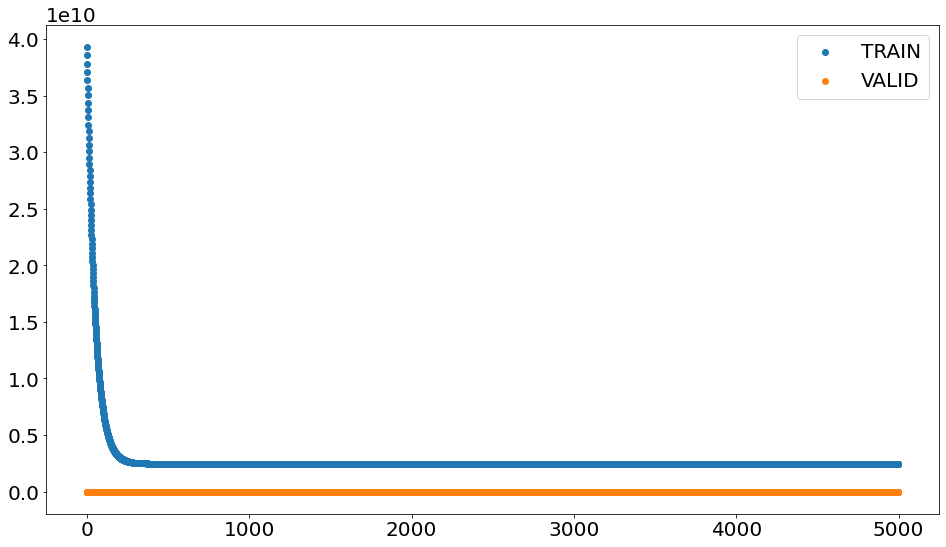

In [89]:
fig,ax=plt.subplots(figsize=(16,9))
plt.rcParams["font.size"]=20
plt.scatter(range(len(reg6.loss)),reg6.loss,label='TRAIN')
plt.scatter(range(len(reg6.val_loss)),reg6.val_loss,label='VALID')
plt.legend()
plt.show();

In [90]:
x=np.arange(-100,100,1)
J=1/2*(x-1)**2

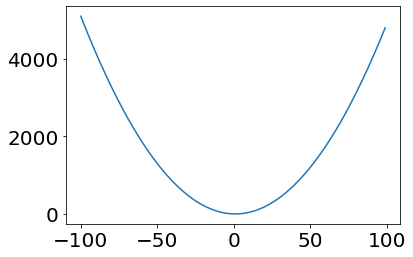

In [91]:
plt.plot(x,J);